# Bag of Words Meets Bags of Popcorn
https://www.kaggle.com/c/word2vec-nlp-tutorial

### Data

In [40]:
import pandas as pd

In [41]:
train_data = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [42]:
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [43]:
train_data['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### Data Cleaning and Text Preprocessing

In [44]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

In [45]:
def preprocessing(text):
    # get text from html
    clean_text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Dealing with Punctuation and numbers
    clean_text = re.sub("[^a-zA-Z]", ' ', clean_text)
    
#     lower-case and split into words
    clean_text = clean_text.lower().split()
    
#     stopwords
    words = [word for word in clean_text if word not in stopwords.words('english')]
    
    return (' '.join(words))

In [46]:
train_data['review'] = train_data['review'].apply(preprocessing)

In [47]:
train_data['review'][0]

u'stuff going moment mj ve started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad m kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate 

### Creating Features from a Bag of Words (Using scikit-learn)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

In [49]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, 
                             preprocessor = None, stop_words = None, max_features = 5000)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_data['review'], train_data['sentiment'], 
                                                    test_size=0.3, stratify=train_data['sentiment'],
                                                    random_state=42)

In [51]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
X_train = vectorizer.fit_transform(X_train).toarray()

In [52]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
X_train.shape

(17500, 5000)

In [54]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
len(vocab)

5000

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest_train = forest.fit(X_train, y_train)

### Predictions

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
# Read the test data
# test = pd.read_csv("testData.tsv", header=0, delimiter="\t")

# # Verify that there are 25,000 rows and 2 columns
# print test.shape

# Create an empty list and append the clean reviews one by one
# test['review'] = test['review'].apply(preprocessing)

# Get a bag of words for the test set, and convert to a numpy array
X_test = vectorizer.transform(X_test).toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(X_test)

### Evaluation

In [59]:
proba = forest.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba)

0.92242911999999999

In [60]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
fpr, tpr, _ = roc_curve(y_test, proba)

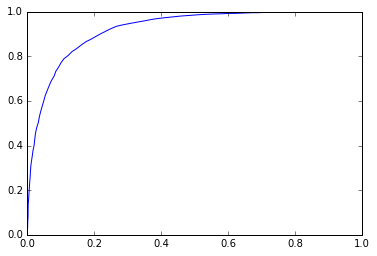

In [62]:
plt.plot(fpr, tpr)

Congratulations, you are ready to make your first submission! Try different things and see how your results change. You can clean the reviews differently, choose a different number of vocabulary words for the Bag of Words representation, try Porter Stemming, a different classifier, or any number of other things. To try out your NLP chops on a different data set, you can also head over to our Rotten Tomatoes competition. Or, if you're ready for something completely different, move along to the Deep Learning and Word Vector pages.

# Introducing Distributed Word Vectors

Word2Vec does not need labels in order to create meaningful representations. This is useful, since most data in the real world is unlabeled. If the network is given enough training data (tens of billions of words), it produces word vectors with intriguing characteristics. Words with similar meanings appear in clusters, and clusters are spaced such that some word relationships, such as analogies, can be reproduced using vector math. The famous example is that, with highly trained word vectors, "king - man + woman = queen."

In [115]:
import pandas as pd
import nltk
import codecs

In [86]:
train = pd.read_csv("labeledTrainData.tsv", delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", delimiter="\t", quoting=3)
unlabeled_train = pd.read_csv("unlabeledTrainData.tsv", delimiter="\t", quoting=3)

In [97]:
# train['id'] = train['id'].apply(lambda x: x[1:-1])

In [98]:
# Verify the number of reviews that were read (100,000 in total)
print "Read %d labeled train reviews, %d labeled test reviews, " \
 "and %d unlabeled reviews\n" % (train["review"].size,  
 test["review"].size, unlabeled_train["review"].size )

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [105]:
def preprocessing(text):
    # get text from html
    clean_text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Dealing with Punctuation and numbers
    clean_text = re.sub("[^a-zA-Z]", ' ', clean_text)
    
#     lower-case and split into words
    clean_text = clean_text.lower().split()
    
#     stopwords
    words = [word for word in clean_text if word not in set(stopwords.words('english'))]
    
    return (words)

In [116]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences(review, tokenizer):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    review = review[1:-1].decode('utf-8')
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(preprocessing(raw_sentence))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [117]:
sentences = []  # Initialize an empty list of sentences

print "Parsing sentences from training set"
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print "Parsing sentences from unlabeled set"
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


/Users/frayalisia/Documents/HSE/venv-py27/lib/python2.7/site-packages/bs4/__init__.py:198: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  '"%s" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.' % markup)
/Users/frayalisia/Documents/HSE/venv-py27/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.happierabroad.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)


Parsing sentences from unlabeled set


/Users/frayalisia/Documents/HSE/venv-py27/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.archive.org/details/LovefromaStranger" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)
/Users/frayalisia/Documents/HSE/venv-py27/lib/python2.7/site-packages/bs4/__init__.py:198: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  '"%s" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.' % markup)
/Users/frayalisia/Documents/HSE/venv-py27/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.loosec

In [118]:
len(sentences)

796958

In [124]:
import pickle

with open ('sentences.pickle', 'wb') as infile:
    pickle.dump(sentences, infile)

### Training and Saving Your Model

**Architecture**: Architecture options are skip-gram (default) or continuous bag of words. We found that skip-gram was very slightly slower but produced better results.

**Training algorithm**: Hierarchical softmax (default) or negative sampling. For us, the default worked well.
Downsampling of frequent words: The Google documentation recommends values between .00001 and .001. For us, values closer 0.001 seemed to improve the accuracy of the final model.

**Word vector dimensionality**: More features result in longer runtimes, and often, but not always, result in better models. Reasonable values can be in the tens to hundreds; we used 300.

**Context / window size**: How many words of context should the training algorithm take into account? 10 seems to work well for hierarchical softmax (more is better, up to a point).

**Worker threads**: Number of parallel processes to run. This is computer-specific, but between 4 and 6 should work on most systems.

**Minimum word count**: This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. In this case, since each movie occurs 30 times, we set the minimum word count to 40, to avoid attaching too much importance to individual movie titles. This resulted in an overall vocabulary size of around 15,000 words. Higher values also help limit run time.


In [1]:
# read data from pickle 
import pickle

with open('sentences.pickle', 'rb') as infile:
    sentences = pickle.load(infile)
# sentences = pickle.load( open( "save.p", "rb" ) )

In [3]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)

Training model...


In [4]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

In [5]:
# The "doesnt_match" function will try to deduce which word in a set is most dissimilar from the others:
model.doesnt_match("man woman child kitchen".split())

'kitchen'

In [6]:
# We can also use the "most_similar" function to get insight into the model's word clusters:
model.most_similar("man")

[(u'lady', 0.5441102981567383),
 (u'men', 0.537115216255188),
 (u'mans', 0.5203651189804077),
 (u'woman', 0.5073630809783936),
 (u'lad', 0.46420544385910034),
 (u'monk', 0.4288797378540039),
 (u'person', 0.4241042137145996),
 (u'farmer', 0.42244434356689453),
 (u'loretta', 0.4200114905834198),
 (u'widow', 0.4167330861091614)]

In [7]:
# Or, more relevant for sentiment analysis:
model.most_similar("awful")

[(u'terrible', 0.7914516925811768),
 (u'horrible', 0.7490581274032593),
 (u'atrocious', 0.7305915355682373),
 (u'dreadful', 0.7277626991271973),
 (u'abysmal', 0.7199400067329407),
 (u'horrid', 0.712208092212677),
 (u'horrendous', 0.7019010782241821),
 (u'appalling', 0.6605275273323059),
 (u'lousy', 0.655040979385376),
 (u'laughable', 0.6133431196212769)]

# More Fun With Word Vectors

In [8]:
# # Load the model that we created in Part 2
# from gensim.models import Word2Vec
# model = Word2Vec.load("300features_40minwords_10context")

# type(model.syn0)

# model.syn0.shape

### From Words To Paragraphs, Attempt 1: Vector Averaging

One challenge with the IMDB dataset is the variable-length reviews. We need to find a way to take individual word vectors and transform them into a feature set that is the same length for every review.

Since each word is a vector in 300-dimensional space, we can use vector operations to combine the words in each review. One method we tried was to simply average the word vectors in a given review (for this purpose, we removed stop words, which would just add noise).

The following code averages the feature vectors, building on our code from Part 2. 

In [9]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0.
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       
       # Print a status message every 1000th review
        if counter%1000. == 0.:
            print "Review %d of %d" % (counter, len(reviews))
       
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, \
           num_features)
       
       # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs

Now, we can call these functions to create average vectors for each paragraph. The following operations will take a few minutes:

In [ ]:
# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

# clean_train_reviews = []
# for review in train["review"]:
#     clean_train_reviews.append(preprocessing(review))

# trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

# print "Creating average feature vecs for test reviews"
# clean_test_reviews = []
# for review in test["review"]:
#     clean_test_reviews.append(preprocessing(review))

# testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

In [ ]:
# Fit a random forest to the training data, using 100 trees
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(n_estimators = 100)

# print "Fitting a random forest to labeled training data..."
# forest = forest.fit( trainDataVecs, train["sentiment"] )

# # Test & extract results 
# result = forest.predict(testDataVecs)

# Write the test results 
# output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
# output.to_csv( "Word2Vec_AverageVectors.csv", index=False, quoting=3 )

Since the element-wise average of the vectors didn't produce spectacular results, perhaps we could do it in a more intelligent way? A standard way of weighting word vectors is to apply "tf-idf" weights, which measure how important a given word is within a given set of documents. One way to extract tf-idf weights in Python is by using scikit-learn's TfidfVectorizer, which has an interface similar to the CountVectorizer that we used in Part 1. However, when we tried weighting our word vectors in this way, we found no substantial improvement in performance.